# Deep Learning - Nasir Hussain - 2021/02/14

# Chapter 02 - Before we begin: the mathematical building blocks of neural networks

In [1]:
# Tensor
    # Multidimesnion numpy arrays are known as tensors
    # container of data
# Tensor Operations
    # Layers building blocks
    # gears of neural networks
# differentiation
    # process of finding rate of change
# gradient descent
    # algorithm to minimize a function by moving in direction of steepest descent
    # allows your model to learn from its training examples.

## 2.1 A first look at a neural network

In [2]:
# a category in a classification problem is called a class. 
# Data points are called samples. 
# The class associated with a specific sample is called a label.

In [3]:
# Listing 2.1 Loading the MNIST dataset in Keras

    # grayscale images
    # 28 * 28 pixcels
    # 10 classes
    # 60000 training
    # 10000 testing

# import mnist data set from keras
from tensorflow.keras.datasets import mnist

2022-05-04 00:24:51.960775: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-04 00:24:51.960805: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
# Listing 2.1 Loading the MNIST dataset in Keras

# split data to training and testing data sets
# data
    # images
    # labels
# train_images and train_labels form the training set,
# test set, test_images and test_labels
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# The images are encoded as Numpy arrays
# labels are an array of digits, ranging from 0 to 9. 
# The images and labels have a one-to-one correspondence.

In [5]:
# training data
print("Shape of training images : ",train_images.shape)
print("Shape of training images labels : ",train_labels.shape)
print("Labels of training images : ",train_labels)

Shape of training images :  (60000, 28, 28)
Shape of training images labels :  (60000,)
Labels of training images :  [5 0 4 ... 5 6 8]


In [6]:
# testing data
print("Shape of test images : ",test_images.shape)
print("Shape of test images labels : ",test_labels.shape)
print("Labels of test images : ",test_labels)

Shape of test images :  (10000, 28, 28)
Shape of test images labels :  (10000,)
Labels of test images :  [7 2 1 ... 4 5 6]


In [7]:
# WorkFlow
    # feed the neural network the training data
    # learn to associate images and labels
    # ask the network to produce predictions for test_images
    # verify whether these predictions match the labels from test_labels

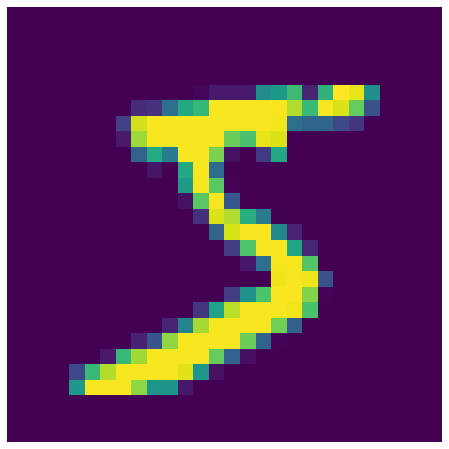

In [8]:
# Check one of the image
import matplotlib.pylab as plt
def plti(im, h=8, **kwargs):
    """
    Helper function to plot an image.
    """
    y = im.shape[0]
    x = im.shape[1]
    w = (y/x) * h
    plt.figure(figsize=(w, h))
    plt.imshow(im, interpolation="none", **kwargs)
    plt.axis('off')
plti(train_images[0])

In [9]:
# Layer
    # The core building block of neural networks 
    # a data-processing module (filter).
    # Some data goes in, and it comes out in a more use-ful form.
    # Extract representations
# Deep learning consists of channing together simple layers whihc forms data distillation
# Model
    # made of refined data filters

In [10]:
# Listing 2.2 The network architecture

# import model and layers
from tensorflow import keras
from tensorflow.keras import layers

# Define network and layers
model = keras.Sequential([
    layers.Dense(512,activation="relu"),
    layers.Dense(10,activation="softmax")
])
# sequential model process one layer at a time
# Dense is type of neural network
# input shape defines shape of input data if added to layer
# initial number is shape of output data from a layer / nodes of layer
# activation function 
    # transform linearity to non-linearity 
    # defines how weighted sum is transformed
# relu is rectified linear unit it returns as it is if positive other wise zero
# softmax predict a multinomial probability distribution

2022-05-04 00:24:55.736243: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-04 00:24:55.736993: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-04 00:24:55.737068: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-05-04 00:24:55.737134: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-05-04 00:24:55.738905: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [11]:
# Compilation step
# An optimizer
    # The mechanism through which the model will update itself based on the training data it sees, 
    # so as to improve its performance.
# A loss function
    # How the model will be able to measure its performance on the training data, 
    # and thus how it will be able to steer itself in the right direction.
# Metrics to monitor during training and testing
    # Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

In [12]:
# Listing 2.3 The compilation step

model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
# rmsprop
    # Root Mean Squared Propagation
    # The RMSprop optimizer restricts the oscillations in the vertical direction
# sparse_categorical_crossentropy
    # Use this crossentropy loss function when there are two or more label classes. 
    # We expect labels to be provided as integers.

In [13]:
# Listing 2.4 Preparing the image data

# We need to reshape our data as it is of shape (60000,28,28) 
# on the other hand we need to use this data as initial nodes
# thus data is reshaped to (60000,28*28)
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))
# Initally values are between interval [0,225]
# scale them to be in interval [0,1]
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

In [14]:
# Data
    # Continous
    # Discrete
        # ordinal
            # can be re-arranged
        # nominal
            # can't be re-arranged

# One hot encoding can be used to transform data to catgorical format
#       A*  A   B*  B   C   D   F
#   A*  1   0   0   0   0   0   0
#   A   0   1   0   0   0   0   0
#   B*  0   0   1   0   0   0   0
#   B   0   0   0   1   0   0   0
#   C   0   0   0   0   1   0   0
#   D   0   0   0   0   0   1   0
#   F   0   0   0   0   0   0   1

In [15]:
# print(train_labels[0])
# # Not as such required in latest version 
# from tensorflow.keras.utils import to_categorical
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)
# print(train_labels[0])

In [16]:
# Listing 2.5 “Fitting” the model
# train the model, 
    # we fit the model to its training data.
model.fit(train_images, train_labels, epochs=5, batch_size=128)
# Accuracy and loss is over the training data

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2549 - accuracy: 0.9260
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1036 - accuracy: 0.9700
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0678 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0490 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0368 - accuracy: 0.9889


In [17]:
# Listing 2.6 Using the model to make predictions

import numpy as np
# Take first 10 images from the test images
test_digits = test_images[0:10]
# predict the model behaviour on the slice of test images
predictions = model.predict(test_digits)
# check predictio of first test digit
print(np.shape(predictions[0]))
# Each prdiction is probability of ten classes
predictions[0]

(10,)


array([1.3593418e-09, 1.6998004e-10, 3.3544620e-07, 1.4652241e-05,
       4.8254040e-12, 2.3962686e-08, 5.5623082e-15, 9.9998307e-01,
       6.2424888e-08, 1.8089728e-06], dtype=float32)

In [18]:
# find index of the higest probability whihc crosponds to the same label as index
predictions[0].argmax()

7

In [19]:
# higest probability
predictions[0][7]

0.9999831

In [20]:
# Check the label from the test tabels
test_labels[0]

7

In [21]:
# Listing 2.7 Evaluating the model on new data

# compute average accuracy over the entire test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")
print(f"test_loss: {test_loss}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0663 - accuracy: 0.9817
test_acc: 0.9817000031471252
test_loss: 0.06630222499370575


In [22]:
# gap between training accuracy and test accuracy is an example of overfitting

## 2.2 Data representations for neural networks

In [23]:
# tensors
    # Multi-dimensional numpy array
    # basic data structure for machine learning
    # matrices are rank 2 tensors
    # dimension is also termed as axis

### 2.2.1 Scalars (rank-0 tensors)

In [24]:
# A tensor that contains only one number is called a scalar
    # scalar tensor
    # rank-0 tensor
    # 0D tensor
# float32 or float64 number is a scalar tensor
# a scalar tensor has 0 axes
# axes == rank

In [25]:
import numpy as np
x = np.array(12)
print("X = ",x)
print("axes = ",x.ndim)
print("rank = ",x.ndim)

X =  12
axes =  0
rank =  0


### 2.2.2 Vectors (rank-1 tensors)

In [26]:
# array of numbers is called a vector,
    # rank-1 tensor
    # 1D tensor

In [27]:
x = np.array([12, 3, 6, 14, 7])
print("X = ",x)
print("axes = ",x.ndim)
print("rank = ",x.ndim)

X =  [12  3  6 14  7]
axes =  1
rank =  1


In [28]:
# a vector having five entries is 5-dimensional vector. 
# A 5D vector has only one axis and has five dimensions along its axis, 
# a 5D tensor has five axes
# Dimensionality
    # number of entries along a specific axis
    # the number of axes in a tensor

### 2.2.3 Matrices (rank-2 tensors)

In [29]:
# array of vectors is a matrix
    # rank-2 tensor
    # 2D tensor. 
# A matrix has two axes
    # rows
    # columns

In [30]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
print("X = ",x)
print("axes = ",x.ndim)
print("rank = ",x.ndim)

X =  [[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]]
axes =  2
rank =  2


### 2.2.4 Rank-3 and higher-rank tensors

In [31]:
# pack of matrices in a array
    # rank-3 tensor
    # 3D tensor

In [32]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
print("X = ",x)
print("axes = ",x.ndim)
print("rank = ",x.ndim)

X =  [[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]]
axes =  3
rank =  3


In [33]:
# packing rank-3 tensors in an array => rank-4 tensor
# rank 5 if you process video data.

### 2.2.5 Key attributes

In [34]:
# Number of axes (rank)
    # ndim
# Shape
    # dimensions the tensor has along each axis
# Data type

In [35]:
# Load mnist data
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [36]:
# Dimension / axes / rank of the train images
train_images.ndim
# it is a 3D tensor

3

In [37]:
# shape train images
train_images.shape
# it has 60000 matrices of 28*28 data

(60000, 28, 28)

In [38]:
# data type images
train_images.dtype

dtype('uint8')

9


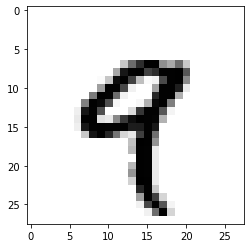

In [39]:
# Listing 2.8 Displaying the fourth image and its label

import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
print(train_labels[4])
plt.show()

### 2.2.6 Manipulating tensors in NumPy

In [40]:
# tensor slicing
    # Selecting specific elements in a tensor

In [41]:
# select image #10 to #100
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [42]:
# a little detailed way of slicing
# : is equivalent to selecting the entire axis
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [43]:
# detailed way of slicing
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

9


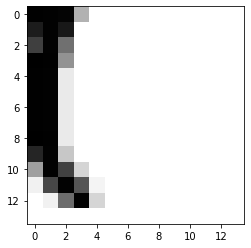

In [44]:
# we can select slices between any two indices along each tensor axis.
# 14 × 14 pixels in the bottom-right corner of all images
my_slice = train_images[:, 14:, 14:]
digit = my_slice[4]
plt.imshow(digit, cmap=plt.cm.binary)
print(train_labels[4])
plt.show()

9


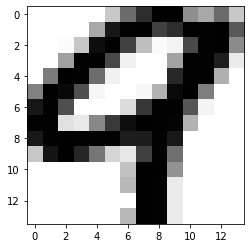

In [45]:
# possible to use negative indices
# 14 × 14 pixels centered in the middle
my_slice = train_images[:, 7:-7, 7:-7]
digit = my_slice[4]
plt.imshow(digit, cmap=plt.cm.binary)
print(train_labels[4])
plt.show()

### 2.2.7 The notion of data batches

In [46]:
# first axis / axis 0 in all data tensors 
    # samples axis
    # samples dimension).
# MNIST example
    # “samples” are images of digits.
# deep learning models don’t process entire dataset at once; they break the data in small batches

In [47]:
# first batch of size 128
batch = train_images[:128]
batch.shape

(128, 28, 28)

In [48]:
# second batch of size 128
batch = train_images[128:256]
batch.shape

(128, 28, 28)

In [49]:
# nth batch of size 128
n = 8
batch = train_images[128*n:128*(n+1)]
batch.shape

(128, 28, 28)

In [50]:
# in batch tensor the first axis (axis 0) is called the batch axis or batch dimension

### 2.2.8 Real-world examples of data tensors

In [51]:
# Vector data
    # Rank-2 tensors
    # shape (samples, features) , 
    # sample
        # a vector of nu-merical attributes (“features”)
# Timeseries data or sequence data
    # Rank-3 tensors
    # shape (samples, timesteps, features)
    # sample
        # a sequence (of length timesteps ) of feature vectors
# Images—Rank
    # 4 tensors
    # shape (samples, height, width, channels)
    # sample
        # a 2D grid of pixels, and each pixel is represented by a vector of values (“channels”)
# Video
    # Rank-5 tensors
        # shape (samples, frames, height, width, channels)
        # sample
            # a sequence (of length frames ) of images

### 2.2.9 Vector data

In [52]:
# each single data point can be encoded as a vector
# a batch of data will be encoded as a rank-2 tensor 
# first axis is the samples axis and the second axis is the features axis.

### 2.2.10 Timeseries data or sequence data

In [53]:
# Data conatins
    # time 
    # the notion of sequence order
    # stores in
        # rank-3 tensor with an explicit time axis. 
# Each sample can be encoded as a sequence of vectors (a rank-2tensor)
# a batch of data will be encoded as a rank-3 tensor
# The time axis is always the second axis (axis of index 1) by convention

### 2.2.11 Image data

In [54]:
# Images
    # three dimensions
    # rank 3
# Image data tensor
    # rank 4
    # channels-last convention
    # channels-first convention

### 2.2.12 Video data

In [55]:
# Videos
    # four dimensions
    # rank 4
# video data tensor
    # rank 5